In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [6]:
img='hand_img.jpg'
img_org=io.imread(img) #reading the image 

In [7]:
# printing the shape of the image
print(img_org.shape)

(612, 493, 3)


In [8]:
# checking the pixel type of an image 
print (img_org.dtype)

uint8


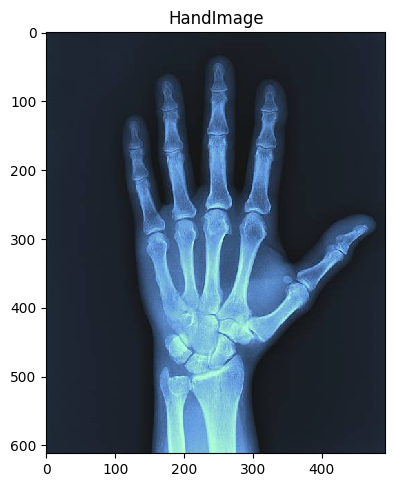

In [9]:
io.imshow(img_org)
plt.title('HandImage')
io.show()

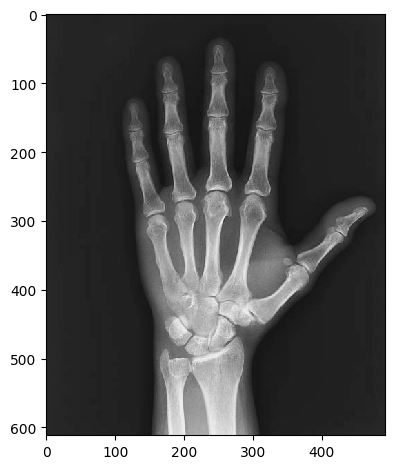

In [10]:
# converting an image to greyscale
img_grey=color.rgb2gray(img_org)
io.imshow(img_grey)

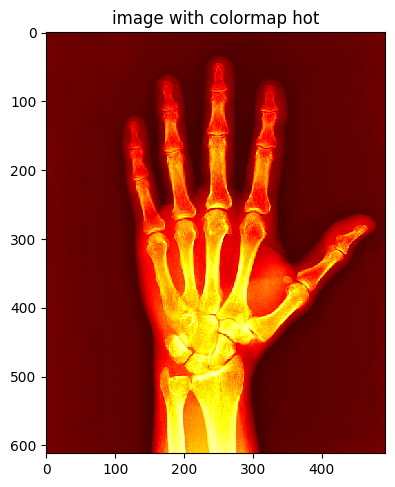

In [14]:
img_hot=io.imshow(img_grey, cmap='hot')
plt.title('image with colormap hot')
plt.show(img_hot)

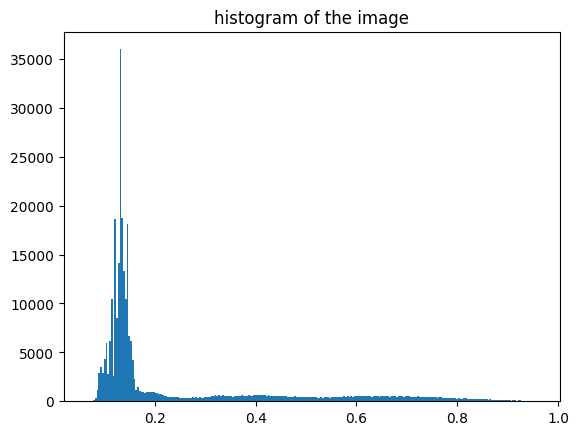

In [15]:
# computing and visualisng the histogram of an image
# the histogram function takes 1d arrays as an input and hence, ravel() is called to convert the image into a 1d array
# h is a list of tuples where in each tuple, the first element is the bin count and the second element is the bin edge
h=plt.hist(img_grey.ravel(),bins=256)
plt.title('histogram of the image')
io.show()

In [16]:
# we can also find the value of a bin by,
bin_no=100
count=h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")


There are 596.0 pixel values in bin 100


In [17]:
# the bin edges can be found by
bin_left=h[1][bin_no]
bin_right=h[1][bin_no+1]
print(f"The bin edges for bin {bin_no} are {bin_left} and {bin_right}")

The bin edges for bin 100 are 0.41311500612745106 and 0.41660999540441185


In [18]:
# pixel values and image coordinate system
r=100
c=50
im_val=img_grey[r,c]
print(f"The pixel value at row {r} and column {c} is {im_val}")

The pixel value at row 100 and column 50 is 0.14602862745098039


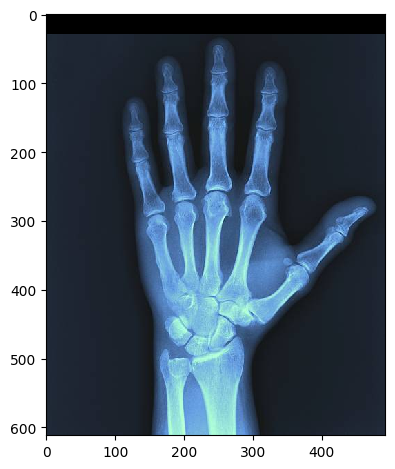

In [24]:
# as the image is represented as a numpy array, the usual slicing operations can be performed 
img_org[:30]=0
io.imshow(img_org)
io.show()

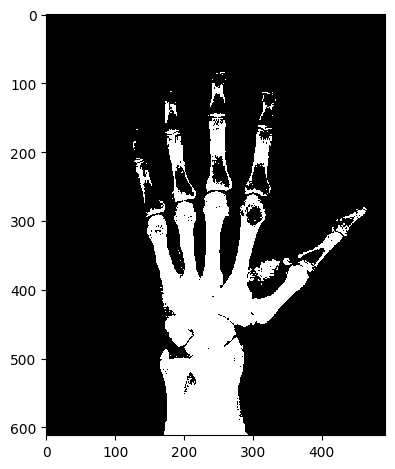

In [29]:
# masking is a binary image where the values are either 0 or 1 
mask=img_grey>0.5
io.imshow(mask)
io.show()

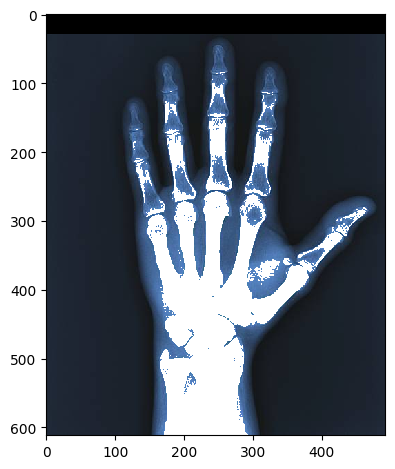

In [30]:
img_org[mask] = 255
io.imshow(img_org)
io.show()

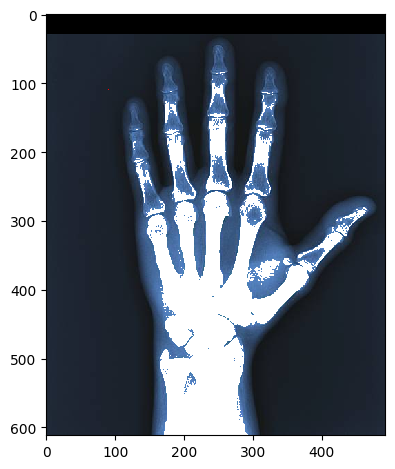

In [32]:
# color images
# each pixel is defined using 3 values: r,g and b
r=110
c=90
img_org[r,c]=[255,0,0]
io.imshow(img_org)

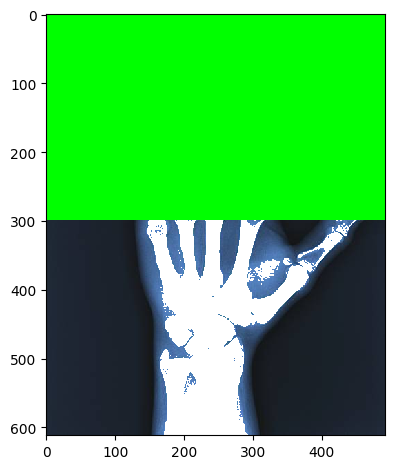

In [35]:
# to color the top half of the image using slicing
img_org[:300]=[0,255,0]
io.imshow(img_org)
io.show()

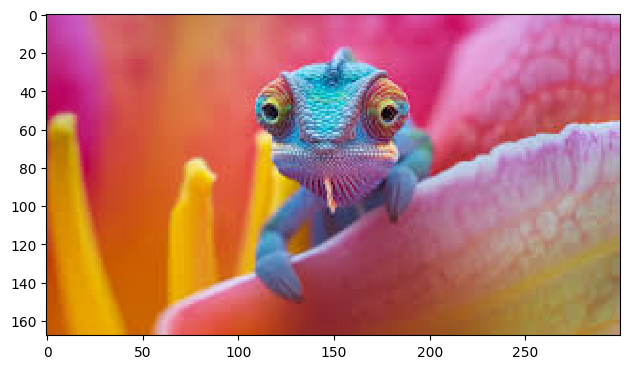

In [37]:
# trying on another image
img=io.imread('chameleon.jpg')
io.imshow(img)
io.show()

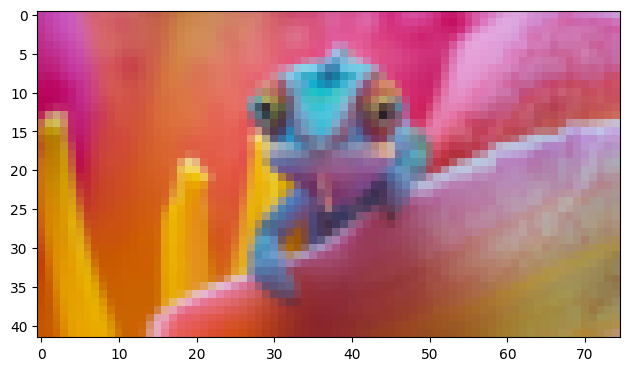

In [39]:
image_rescaled = rescale(img, 0.25, anti_aliasing=True,
                         channel_axis=2)
io.imshow(image_rescaled)
io.show()

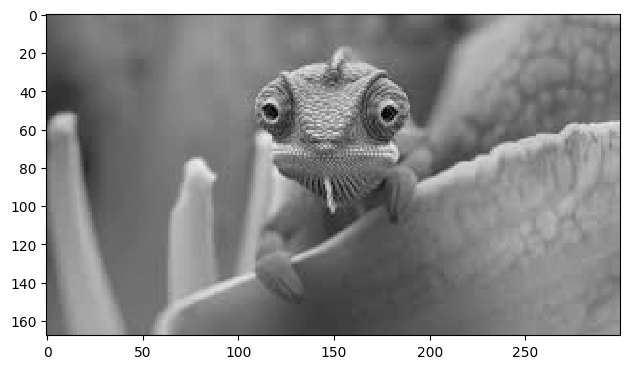

In [40]:
img_gray=color.rgb2gray(img)
io.imshow(img_gray)
io.show()

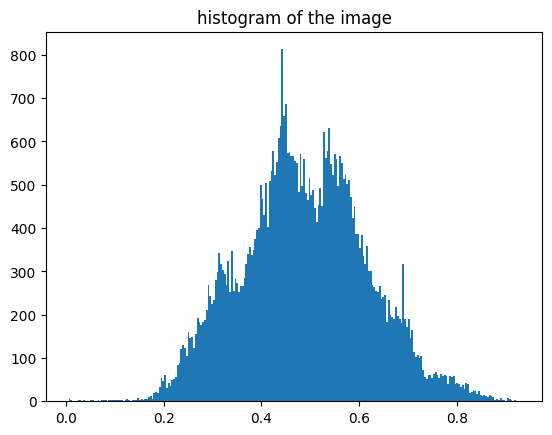

In [41]:
# computing the histogram of the image
h=plt.hist(img_gray.ravel(),bins=250)
plt.title('histogram of the image')
io.show()

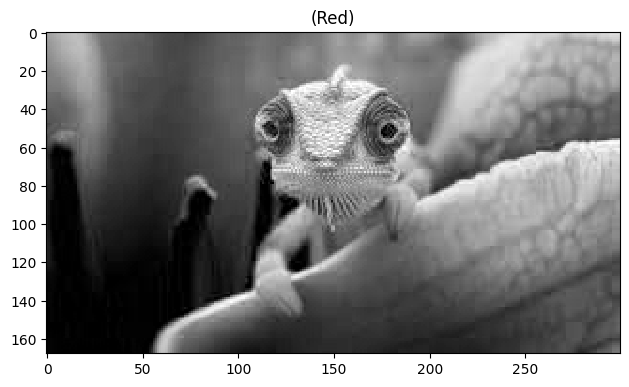

In [45]:
r_comp = img[:, :, 2] #selects all the rows, all the columns and the red component (0) of the image
io.imshow(r_comp)
plt.title('(Red)')
io.show()
# it gives you a grayscale image because it represents an image where each intensity value corresponds to the brightness or intensity of that 
# color component at each pixel